# DS Flat Region Fits

## Background

- The general idea is to try to understand what sort of coarse grid in the flat region we should take to verify the general structure of the field.
- This is the first of 3 coarse tests:
    - Flat region only
    - Graded region only
    - Whole DS, front then back
- We aim to spend 2-3 days on the coarse tests before continuing with a full measurement, so a measurement period of ~6 hours or less for the flat region only would be good.
- We need a grid spacing such that large field errors, coordinate translations and rotations, etc can be picked out first in a coarse grid.
    - For fixing coordinates we can probably do a rough fix by doing 4 phi positions at 3-6 z steps over the entire DS. The gradient region especially should help get an initial coordinate transformation. Maybe the actual field will vary enough from nominal that it's tough to do this without a more detailed dataset. We could then do this with the graded only coarse sweep.
- We should also do a series of tests that validate the field for just the coarse data
    - Gradient along axis must be negative
    - 2 T at start of DS, 1 T at end.
    - Proper location for graded region and flat region.

I have done a series of fits, all with the same number of parameters, but changing the grid points.
- Full: standard spacing, 16*100 = 1600 points...too many for this test
- Sparse z: 16 phi, 10 z (50 cm steps)
    - From initial plots looks reasonable.
- Sparse phi: 8 phi, 100 z
    - Initial plots look pretty bad
- Sparse phi+z: 8 phi, 10 z
    - Initial plots seem ok
- Sparser phi, sparse z: 4 phi, 10 z
    - Initial plots getting questionable at this point...could be a nice quick sweep.

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
init_notebook_mode(True)

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

from mu2e import mu2e_ext_path
from mu2e.dataframeprod import DataFrameMaker

## Comparing Parameter Results

In [5]:
params = pkl.load(open(mu2e_ext_path+"fit_params/Mau13_flat_10_50_4_results.p",'rb'))
params_sparsez = pkl.load(open(mu2e_ext_path+"fit_params/Mau13_flat_sparsez_10_50_4_results.p",'rb'))
params_sparsephi = pkl.load(open(mu2e_ext_path+"fit_params/Mau13_flat_sparsephi_10_50_4_results.p",'rb'))
params_sparsephi_sparsez = pkl.load(open(mu2e_ext_path+"fit_params/Mau13_flat_sparsephi_sparsez_10_50_4_results.p",'rb'))
params_sparserphi_sparsez = pkl.load(open(mu2e_ext_path+"fit_params/Mau13_flat_sparserphi_sparsez_10_50_4_results.p",'rb'))

In [6]:
df_params = pd.DataFrame(index=params.keys())
df_params['full'] = params.values()
df_params['sparsez'] = params_sparsez.values()
df_params['sparsephi'] = params_sparsephi.values()
df_params['sparsephi_sparsez'] = params_sparsephi_sparsez.values()
df_params['sparserphi_sparsez'] = params_sparserphi_sparsez.values()

In [7]:
df_params

,full,sparsez,sparsephi,sparsephi_sparsez,sparserphi_sparsez
pitch1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
ms_h1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
ns_h1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
pitch2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
ms_h2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
ns_h2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
length1,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
ms_c1,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.000000
ns_c1,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000
length2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


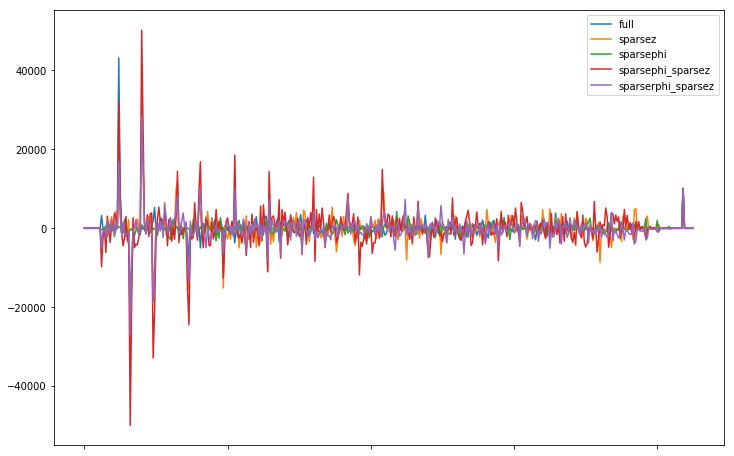

In [8]:
df_params.plot()

In [14]:
for col in df_params.columns:
    dif = (df_params[col]-df_params["full"])/df_params['full']
    dif.name = f"{col}"
    fig = histo(dif,bins=100,yscale='log',cut=[0.05,0.95],inline=True)

So, the parameters don't generally stay the same, however ~1/4 of them change by a factor of 5 or less.

Maybe parameter change is the wrong way to evaluate this...

## More tests (notes)
- Trying out messing with parameters for flat region to see what might make the fit better.
- Do first with full set, then try with others.

- 5 m effective length: very bad! (for sparse phi sparse z, and for full)

### Adding Helical terms

- For the full test the worst part of the fit right now is the Bphi, so maybe adding some helical terms will help?